In [1]:
# Import libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from google.colab import files

In [ ]:
# uploader = files.upload()

In [2]:
# Grab data from .csv file

df = pd.read_csv(open('openpowerlifting.csv', 'rb'))

<ipython-input-2-4b3df0d14f31>:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(open('openpowerlifting.csv', 'rb'))


In [ ]:
# Show data

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [ ]:
# Show all missing data

print(df.isna().sum())

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Squat4Kg           1419658
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Bench4Kg           1413849
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Deadlift4Kg        1414108
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
McCulloch           119100
Glossbrenner        118947
IPFPoints           150068
Tested              329462
Country            1034470
Federation               0
Date                     0
MeetCountry              0
MeetState           481809
MeetName                 0
d

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

In [ ]:
# Show missing values in %

for col in df.columns:
    print(f'{col} : {df[col].isna().sum() / df.shape[0] * 100:.2f}%')

Name : 0.00%
Sex : 0.00%
Event : 0.00%
Equipment : 0.00%
Age : 46.78%
AgeClass : 44.72%
Division : 0.57%
BodyweightKg : 1.18%
WeightClassKg : 0.94%
Squat1Kg : 76.28%
Squat2Kg : 76.58%
Squat3Kg : 77.25%
Squat4Kg : 99.74%
Best3SquatKg : 27.53%
Bench1Kg : 64.89%
Bench2Kg : 65.33%
Bench3Kg : 66.38%
Bench4Kg : 99.33%
Best3BenchKg : 10.34%
Deadlift1Kg : 74.46%
Deadlift2Kg : 74.99%
Deadlift3Kg : 76.12%
Deadlift4Kg : 99.35%
Best3DeadliftKg : 24.00%
TotalKg : 7.74%
Place : 0.00%
Wilks : 8.36%
McCulloch : 8.37%
Glossbrenner : 8.36%
IPFPoints : 10.54%
Tested : 23.15%
Country : 72.68%
Federation : 0.00%
Date : 0.00%
MeetCountry : 0.00%
MeetState : 33.85%
MeetName : 0.00%


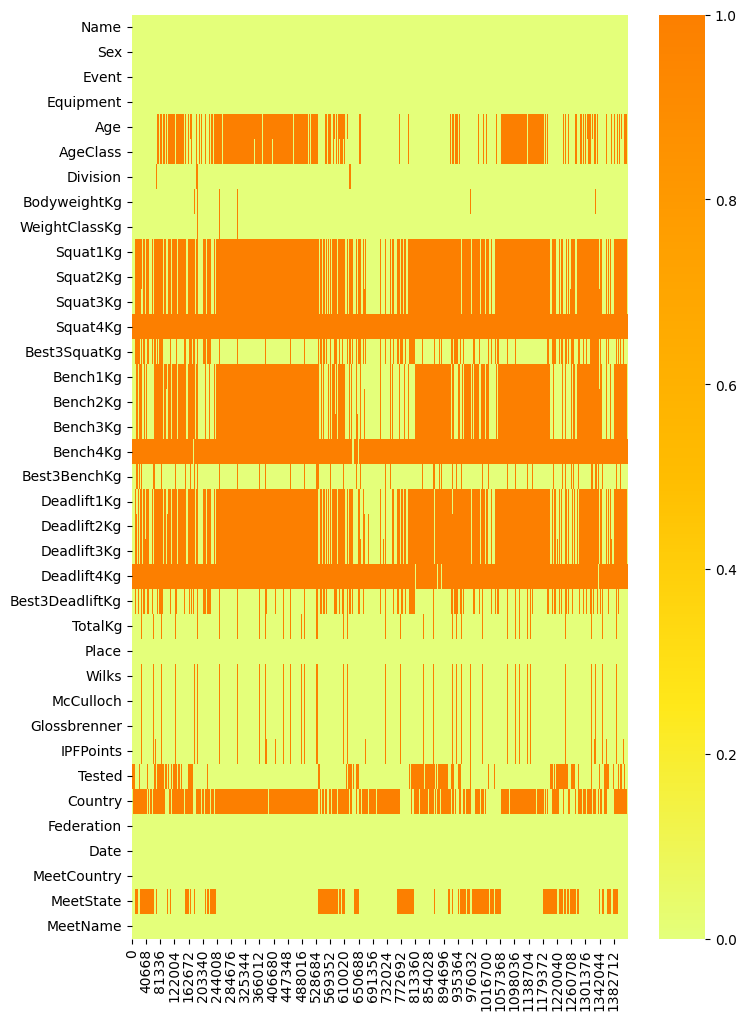

In [ ]:
# show graph

plt.figure(figsize = (8, 12))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [3]:
# Drop colums where at leat 50% of nan data
# In perpose it will be hard to reconcstruate and usually not accurate

df = df.dropna(thresh = df.shape[0] // 2, axis = 1)

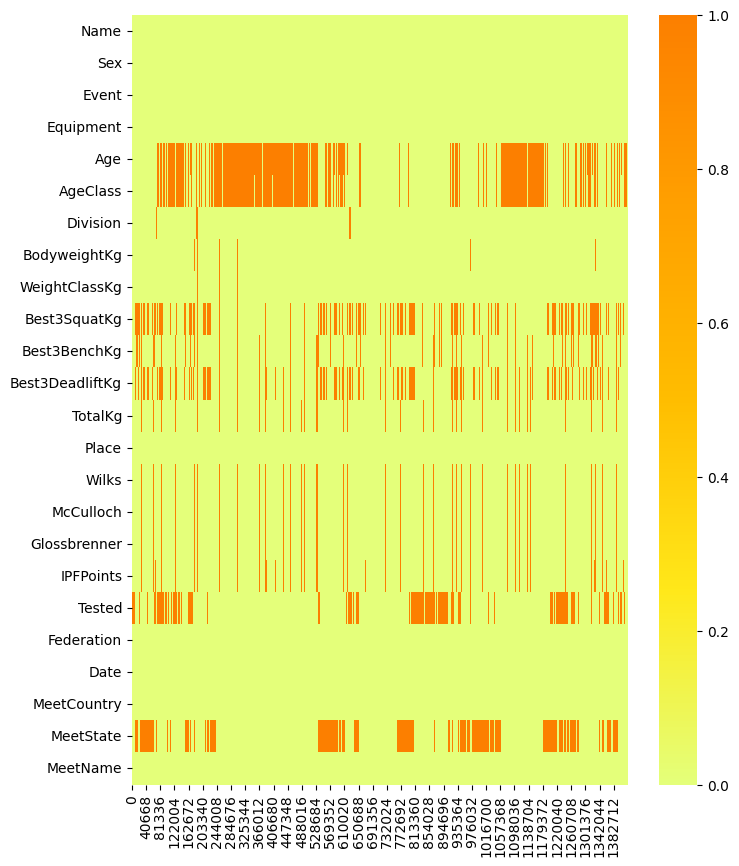

In [ ]:
# And show heatmap now

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [ ]:
df.shape

(1423354, 24)

In [4]:
# So we have 24 featurs, now get rid of rows with less then 20 non-empty featurs

df = df.dropna(thresh = 20, axis = 0)
df.shape

(1260355, 24)

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division             5575
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch             127
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


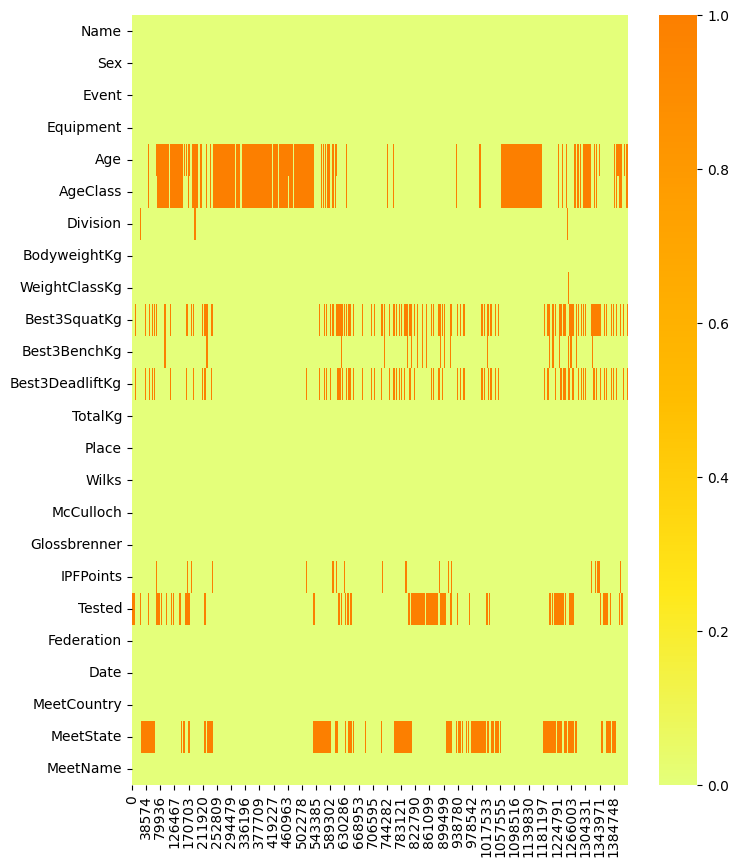

In [ ]:
# So we get rid of less than 200k rows
# Show heat map now

print(df.isna().sum())

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260355 entries, 0 to 1423351
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1260355 non-null  object 
 1   Sex              1260355 non-null  object 
 2   Event            1260355 non-null  object 
 3   Equipment        1260355 non-null  object 
 4   Age              706771 non-null   float64
 5   AgeClass         733046 non-null   object 
 6   Division         1254780 non-null  object 
 7   BodyweightKg     1260355 non-null  float64
 8   WeightClassKg    1258181 non-null  object 
 9   Best3SquatKg     983969 non-null   float64
 10  Best3BenchKg     1205788 non-null  float64
 11  Best3DeadliftKg  1052093 non-null  float64
 12  TotalKg          1260355 non-null  float64
 13  Place            1260355 non-null  object 
 14  Wilks            1260355 non-null  float64
 15  McCulloch        1260228 non-null  float64
 16  Glossbrenner     1

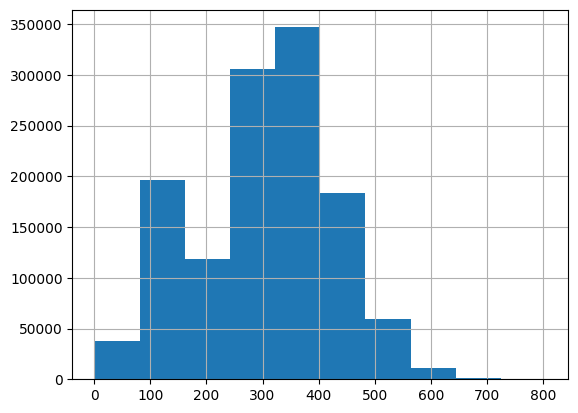

In [ ]:
df['McCulloch'].hist()
plt.show()

In [5]:
# Fill this walue with median

df['McCulloch'] = df['McCulloch'].fillna(df['McCulloch'].median())

print(df.isna().sum())

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division             5575
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch               0
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


In [6]:
# Now handle missing values in Division
# But first of all set division name in lower case

df['Division'] = df['Division'].str.lower()

df['Division'].value_counts()

open                      296268
boys                      242955
girls                     104013
juniors                    46496
mr-o                       28361
                           ...  
pro masters 50                 1
amateur masters 41             1
amateur masters 46             1
amateur masters police         1
juniors under 34               1
Name: Division, Length: 4538, dtype: int64

In [7]:
# See than 'Open' division is the most common, so replace missing values into 'open'
# But .mode() retuen pandas Series, so we need graap [0] to get value ('open')

# Use iloc[0] to get first mode in case we have multiple modes

df['Division'] = df['Division'].fillna(df['Division'].mode().iloc[0])
print(df['Division'].isna().sum())

0


In [ ]:
print(df.isna().sum())

Name                    0
Sex                     0
Event                   0
Equipment               0
Age                553584
AgeClass           527309
Division                0
BodyweightKg            0
WeightClassKg        2174
Best3SquatKg       276386
Best3BenchKg        54567
Best3DeadliftKg    208262
TotalKg                 0
Place                   0
Wilks                   0
McCulloch               0
Glossbrenner            0
IPFPoints           26928
Tested             285410
Federation              0
Date                    0
MeetCountry             0
MeetState          416934
MeetName                0
dtype: int64


In [8]:
print(df['Best3DeadliftKg'].value_counts(), '\n')
print(df['Best3BenchKg'].value_counts(), '\n')
print(df['Best3SquatKg'].value_counts(), '\n')

200.00    17447
250.00    16717
240.00    15263
220.00    15140
230.00    14947
          ...  
61.70         1
277.30        1
149.50        1
113.20        1
307.31        1
Name: Best3DeadliftKg, Length: 1555, dtype: int64 

150.00    18954
120.00    18713
140.00    18281
130.00    18120
125.00    17410
          ...  
52.30         1
197.70        1
143.20        1
90.90         1
148.55        1
Name: Best3BenchKg, Length: 1562, dtype: int64 

200.00    14681
136.08    11887
160.00    11689
190.00    11649
170.00    11598
          ...  
10.50         1
10.00         1
7.50          1
25.50         1
309.58        1
Name: Best3SquatKg, Length: 1640, dtype: int64 



In [9]:
# So we have 3 featurs that in more than 1 million records has nearly 1500 diffrent values
# So it posible to think that we can use index on each colum and fill this values as index

df['Best3DeadliftKg_nan'] = 0
df['Best3BenchKg_nan'] = 0
df['Best3SquatKg_nan'] = 0

df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,511.15,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,595.65,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,NaN,...,313.97,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,547.04,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,550.08,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [10]:
# So just set '1' in new colum if we do not know some data of sportsmens best tres
# And set 0 instand of Nan
# Just keep in mind that '0' meand we do not know what weight human

df.loc[df['Best3DeadliftKg'].isna(), 'Best3DeadliftKg_nan'] = 1
df.loc[df['Best3BenchKg'].isna(), 'Best3BenchKg_nan'] = 1
df.loc[df['Best3SquatKg'].isna(), 'Best3SquatKg_nan'] = 1

df['Best3DeadliftKg'] = df['Best3DeadliftKg'].fillna(0)
df['Best3BenchKg'] = df['Best3BenchKg'].fillna(0)
df['Best3SquatKg'] = df['Best3SquatKg'].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260355 entries, 0 to 1423351
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Name                 1260355 non-null  object 
 1   Sex                  1260355 non-null  object 
 2   Event                1260355 non-null  object 
 3   Equipment            1260355 non-null  object 
 4   Age                  706771 non-null   float64
 5   AgeClass             733046 non-null   object 
 6   Division             1260355 non-null  object 
 7   BodyweightKg         1260355 non-null  float64
 8   WeightClassKg        1258181 non-null  object 
 9   Best3SquatKg         1260355 non-null  float64
 10  Best3BenchKg         1260355 non-null  float64
 11  Best3DeadliftKg      1260355 non-null  float64
 12  TotalKg              1260355 non-null  float64
 13  Place                1260355 non-null  object 
 14  Wilks                1260355 non-null  float64
 15

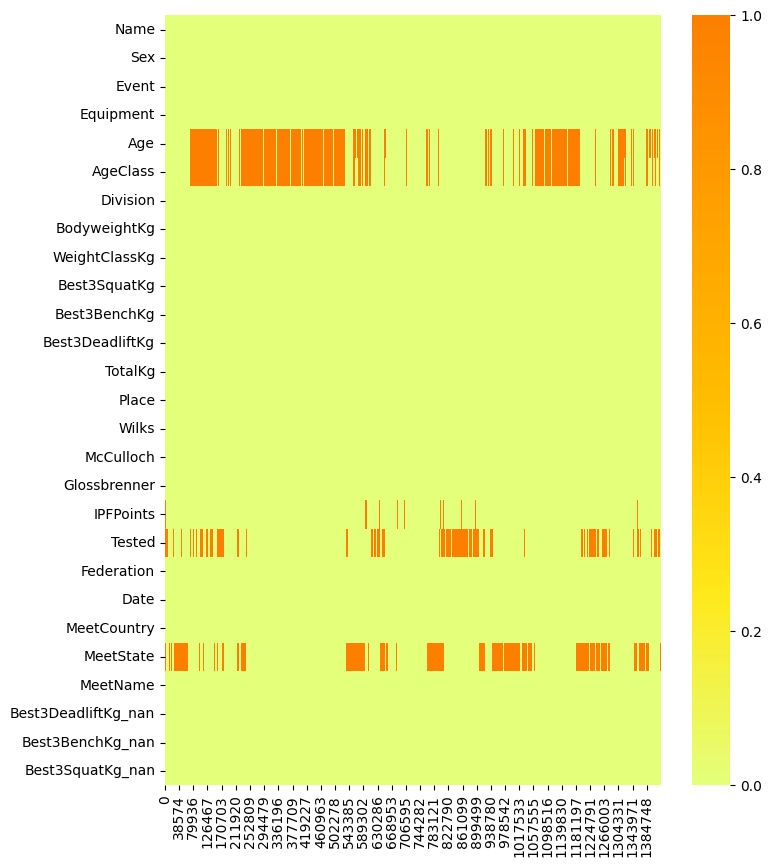

In [ ]:
# Now show heatmap

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [ ]:
# Now handle Age colum

df['AgeClass'].value_counts()

24-34     226608
20-23     128125
35-39      60947
18-19      59941
40-44      59132
16-17      43387
45-49      42552
50-54      33744
13-15      23823
55-59      20596
60-64      14538
65-69       8203
70-74       5552
5-12        2488
75-79       2366
80-999      1044
Name: AgeClass, dtype: int64

In [ ]:
print(df['Age'].isna().sum())

553584


In [11]:
age_class_missing_age = df[df['Age'].isna()]['AgeClass'].value_counts()
age_class_missing_age

20-23     6219
13-15     4137
40-44     2733
24-34     2573
45-49     2291
50-54     1609
35-39     1556
18-19     1174
55-59     1084
16-17     1019
60-64      630
65-69      368
70-74      350
5-12       288
80-999     212
75-79      159
Name: AgeClass, dtype: int64

In [12]:
# Do not use 999 age, so people usually do not live till 999, just remain 99

age_class_missing_age_df = age_class_missing_age.index.str.extract('(\d\d)-(\d\d)')
print(age_class_missing_age_df)

      0    1
0    20   23
1    13   15
2    40   44
3    24   34
4    45   49
5    50   54
6    35   39
7    18   19
8    55   59
9    16   17
10   60   64
11   65   69
12   70   74
13  NaN  NaN
14   80   99
15   75   79


In [13]:
age_class_missing_age_df['AgeClass'] = age_class_missing_age.index
age_class_missing_age_df

,0,1,AgeClass
0,20,23,20-23
1,13,15,13-15
2,40,44,40-44
3,24,34,24-34
4,45,49,45-49
5,50,54,50-54
6,35,39,35-39
7,18,19,18-19
8,55,59,55-59
9,16,17,16-17


In [14]:
def count_mean(x):
    if not x[0] is np.nan:
        return ((int(x[0]) + int(x[1])) / 2)
    else:
        return np.nan

age_class_missing_age_df['mean'] = age_class_missing_age_df.apply(count_mean, axis = 1)
age_class_missing_age_df

,0,1,AgeClass,mean
0,20,23,20-23,21.5
1,13,15,13-15,14.0
2,40,44,40-44,42.0
3,24,34,24-34,29.0
4,45,49,45-49,47.0
5,50,54,50-54,52.0
6,35,39,35-39,37.0
7,18,19,18-19,18.5
8,55,59,55-59,57.0
9,16,17,16-17,16.5


In [15]:
# merge tables
df = df.merge(age_class_missing_age_df[['AgeClass', 'mean']], on = 'AgeClass', how = 'left')
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan,mean
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,29.0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,29.0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1,42.0
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,21.5
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,47.0


In [16]:
mean_age_by_age_group = df.groupby('AgeClass')['mean'].transform('mean')
mean_age_by_age_group

0          29.0
1          29.0
2          42.0
3          21.5
4          47.0
           ... 
1260350    67.0
1260351    67.0
1260352    62.0
1260353    57.0
1260354    62.0
Name: mean, Length: 1260355, dtype: float64

In [17]:
df['Age'] = df['Age'].fillna(mean_age_by_age_group)
df['Age'].isna().sum()

527470

In [18]:
# So there were 553584 missing ages in 'Age' colum, now there are 527470

df = df.drop('mean', axis = 1)
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,...,511.15,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,...,595.65,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,Ainslee Hooper,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,...,313.97,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,...,547.04,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,...,550.08,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0


In [19]:
# Let's do same thing using Division

print(df['Division'].value_counts())

open                      301843
boys                      242955
girls                     104013
juniors                    46496
mr-o                       28361
                           ...  
pro masters 50                 1
amateur masters 41             1
amateur masters 46             1
amateur masters police         1
juniors under 34               1
Name: Division, Length: 4538, dtype: int64


In [20]:
division_missing_age = df[df['Age'].isna()]['Division'].value_counts()
division_missing_age

boys                229233
girls                98058
open                 74648
juniors              11283
amateur open          7473
                     ...  
м2 50-59                 1
wp-x                     1
submasters 30-38         1
wsm-2                    1
below class 2            1
Name: Division, Length: 1372, dtype: int64

In [ ]:
division_missing_age_df = division_missing_age.index.str.extract('(\d\d)-(\d\d)|(\d\d)')
print(division_missing_age_df)

        0    1    2
0     NaN  NaN  NaN
1     NaN  NaN  NaN
2     NaN  NaN  NaN
3     NaN  NaN  NaN
4     NaN  NaN  NaN
...   ...  ...  ...
1367   50   59  NaN
1368  NaN  NaN  NaN
1369   30   38  NaN
1370  NaN  NaN  NaN
1371  NaN  NaN  NaN

[1372 rows x 3 columns]


In [21]:
def count_mean(x):
    if not x[0] is np.nan:
        return ((int(x[0]) + int(x[1])) / 2)
    elif not x[2] is np.nan:
        return int(x[2])
    else:
        return np.nan

division_missing_age_df['mean'] = division_missing_age_df.apply(count_mean, axis = 1)
division_missing_age_df

NameError: name 'division_missing_age_df' is not defined

In [ ]:
division_missing_age_df['Division'] = division_missing_age.index
division_missing_age_df

In [ ]:
# merge tables

df = df.merge(division_missing_age_df[['Division', 'mean']], on = 'Division', how = 'left')
df.head()

In [ ]:
mean_age_by_devision = df.groupby('Division')['mean'].transform('mean')
mean_age_by_devision

In [ ]:
df[df['Age'].isna()]

,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,...,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan,mean
103,Tim Plummer,M,SBD,Wraps,NaN,NaN,m-or,109.5,110,165.0,...,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0,NaN
620,Mike Read,M,SBD,Wraps,NaN,NaN,m-or,120.9,125,190.0,...,NaN,GPC-AUS,2013-04-28,Australia,VIC,Victoria Qualifier,0,0,0,NaN
877,Alexandra Hegman,F,SBD,Wraps,NaN,NaN,f-or,63.2,67.5,120.0,...,NaN,GPC-AUS,2017-09-09,Australia,VIC,Melbourne Cup,0,0,0,NaN
3285,Amanda Woodward,F,SBD,Wraps,NaN,40-44,f-m1r,66.2,67.5,115.0,...,NaN,GPC-AUS,2012-03-25,Australia,VIC,VIC State Titles,0,0,0,NaN
3595,Eddy Dargham,M,SBD,Wraps,NaN,NaN,m-or,82.3,82.5,210.0,...,NaN,GPC-AUS,2014-03-08,Australia,VIC,VIC States,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260256,Michał Kowalczyk,M,SBD,Raw,NaN,NaN,juniors under 16,79.2,83,175.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260258,Norbert Kaczor,M,SBD,Raw,NaN,NaN,juniors under 16,84.4,93,137.5,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260259,Daniel Machulik,M,SBD,Raw,NaN,NaN,juniors under 16,83.3,93,115.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0
1260260,Jakub Ostrowski,M,SBD,Raw,NaN,NaN,juniors under 16,73.0,74,110.0,...,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0,16.0


In [ ]:
df['Age'] = df['Age'].fillna(mean_age_by_devision)
df['Age'].isna().sum()

In [ ]:
# Now we have 498508 instand of 527470 missing age values

# Let's see 20 most popular divisions by missing ages

df = df.drop('mean', axis = 1)

df.groupby('Division')['Age'].apply(lambda x: x.isnull().sum()).reset_index(name = 'MissingAgeCount').sort_values('MissingAgeCount', ascending = False)[:20]

In [22]:
# Let's get median age in each division and fill empty rows with

df['Age'] = df.groupby('Division')['Age'].transform(lambda x: x.fillna(x.median()) if x.notna().sum() != 0 else x)

df.groupby('Division')['Age'].apply(lambda x: x.isnull().sum()).reset_index(name = 'MissingAgeCount').sort_values('MissingAgeCount', ascending = False)[:20]

,Division,MissingAgeCount
4075,sophomore,50
1496,high school pure,38
4128,submasters 30-34,23
1464,grade 9-10,18
58,14-16,18
4466,wsqopen,16
3172,masters heavy,14
206,adfpa open,14
113,30-39,14
100,1year,14


In [ ]:
print(df['Age'].isna().sum())

516


In [23]:
# So i guess we can simply fill with median of all dataset remain 516 values

df['Age'] = df['Age'].fillna(df['Age'].median())

print(df['Age'].isna().sum())

0


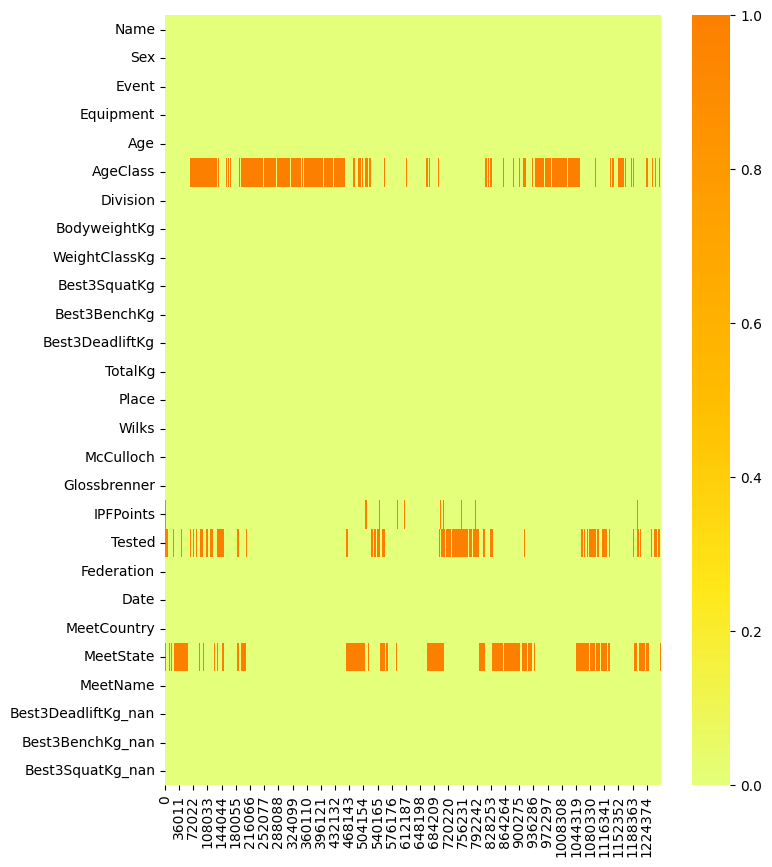

In [ ]:
# Show heat map now

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [ ]:
# May be there are some dublicates

df.duplicated().sum()

2647

In [24]:
# Drop them

df = df.drop_duplicates()

df.duplicated().sum()

0

In [25]:
# Now drop rows with nan in IPFPoints, just in case

df = df.dropna(subset = ['IPFPoints'])

df.isna().sum()

Name                        0
Sex                         0
Event                       0
Equipment                   0
Age                         0
AgeClass               519920
Division                    0
BodyweightKg                0
WeightClassKg            2080
Best3SquatKg                0
Best3BenchKg                0
Best3DeadliftKg             0
TotalKg                     0
Place                       0
Wilks                       0
McCulloch                   0
Glossbrenner                0
IPFPoints                   0
Tested                 276208
Federation                  0
Date                        0
MeetCountry                 0
MeetState              411421
MeetName                    0
Best3DeadliftKg_nan         0
Best3BenchKg_nan            0
Best3SquatKg_nan            0
dtype: int64

In [ ]:
print(df.shape)

(1231156, 27)


In [ ]:
# See what Tested means

df['Tested'].value_counts()

Yes    954948
Name: Tested, dtype: int64

In [26]:
# As soon as we have no other option in this colum simply set 'No' in nan rows

df['Tested'] = df['Tested'].fillna('No')

df.isna().sum()

Name                        0
Sex                         0
Event                       0
Equipment                   0
Age                         0
AgeClass               519920
Division                    0
BodyweightKg                0
WeightClassKg            2080
Best3SquatKg                0
Best3BenchKg                0
Best3DeadliftKg             0
TotalKg                     0
Place                       0
Wilks                       0
McCulloch                   0
Glossbrenner                0
IPFPoints                   0
Tested                      0
Federation                  0
Date                        0
MeetCountry                 0
MeetState              411421
MeetName                    0
Best3DeadliftKg_nan         0
Best3BenchKg_nan            0
Best3SquatKg_nan            0
dtype: int64

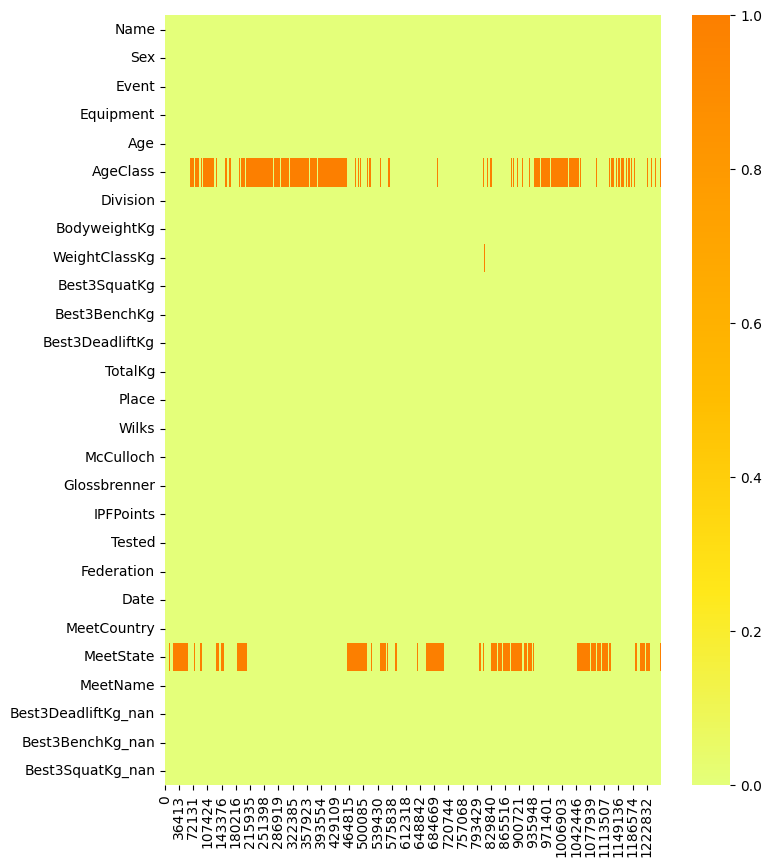

In [ ]:
# See heat map

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Name                 1231156 non-null  object 
 1   Sex                  1231156 non-null  object 
 2   Event                1231156 non-null  object 
 3   Equipment            1231156 non-null  object 
 4   Age                  1231156 non-null  float64
 5   AgeClass             711236 non-null   object 
 6   Division             1231156 non-null  object 
 7   BodyweightKg         1231156 non-null  float64
 8   WeightClassKg        1229076 non-null  object 
 9   Best3SquatKg         1231156 non-null  float64
 10  Best3BenchKg         1231156 non-null  float64
 11  Best3DeadliftKg      1231156 non-null  float64
 12  TotalKg              1231156 non-null  float64
 13  Place                1231156 non-null  object 
 14  Wilks                1231156 non-null  float64
 15

In [27]:
# drop names

df = df.drop('Name', axis = 1)

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,F,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,F,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,F,B,Raw,40.0,40-44,f-or,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,F,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,F,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,M,SBD,Raw,65.5,65-69,masters 2,78.0,83,215.0,115.0,...,549.30,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260351,M,SBD,Raw,67.5,65-69,masters 2,72.7,74,200.0,70.0,...,538.44,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260352,M,SBD,Raw,60.5,60-64,masters 2,73.5,74,175.0,87.5,...,469.67,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260353,M,SBD,Raw,55.5,55-59,masters 2,63.5,66,110.0,95.0,...,423.03,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0


In [28]:
# What about sex?

df['Sex'].value_counts()

M    908918
F    322238
Name: Sex, dtype: int64

In [29]:
# We have only two genders
# And it's seems that there are much more mans than womans

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

df

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,IPFPoints,Tested,Federation,Date,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,Wraps,29.0,24-34,f-or,59.8,60,105.0,55.0,...,511.15,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,Wraps,29.0,24-34,f-or,58.5,60,120.0,67.5,...,595.65,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,Raw,40.0,40-44,f-or,55.4,56,0.0,32.5,...,313.97,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,Wraps,23.0,20-23,f-or,60.0,60,105.0,72.5,...,547.04,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,Wraps,45.0,45-49,f-or,104.0,110,140.0,80.0,...,550.08,No,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260350,1,SBD,Raw,65.5,65-69,masters 2,78.0,83,215.0,115.0,...,549.30,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260351,1,SBD,Raw,67.5,65-69,masters 2,72.7,74,200.0,70.0,...,538.44,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260352,1,SBD,Raw,60.5,60-64,masters 2,73.5,74,175.0,87.5,...,469.67,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0
1260353,1,SBD,Raw,55.5,55-59,masters 2,63.5,66,110.0,95.0,...,423.03,Yes,PZKFiTS,2017-04-01,Poland,NaN,Polish Classic Powerlifting Cup,0,0,0


In [30]:
# Drop date

df = df.drop('Date', axis = 1)

In [31]:
# Let's see info about Equipment

counts = df['Equipment'].value_counts()

counts

Single-ply    673435
Raw           407775
Wraps          97964
Multi-ply      51974
Straps             8
Name: Equipment, dtype: int64

In [32]:
for i, j in zip(counts.index, counts.values):
    if j < 100000:
        df['Equipment'] = df['Equipment'].replace(i, 'Others')

df['Equipment'].value_counts()

Single-ply    673435
Raw           407775
Others        149946
Name: Equipment, dtype: int64

In [33]:
# It's take too long, try another way in the future
# Now apply lable encoding

df['Equipment'] = label_encoder.fit_transform(df['Equipment'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,f-or,59.8,60,105.0,55.0,...,286.42,511.15,No,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,f-or,58.5,60,120.0,67.5,...,334.16,595.65,No,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,f-or,55.4,56,0.0,32.5,...,34.12,313.97,No,GPC-AUS,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,f-or,60.0,60,105.0,72.5,...,305.37,547.04,No,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,f-or,104.0,110,140.0,80.0,...,274.56,550.08,No,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0


In [34]:
# Let's process tested colum

df['Tested'] = label_encoder.fit_transform(df['Tested'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,f-or,59.8,60,105.0,55.0,...,286.42,511.15,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,f-or,58.5,60,120.0,67.5,...,334.16,595.65,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,f-or,55.4,56,0.0,32.5,...,34.12,313.97,0,GPC-AUS,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,f-or,60.0,60,105.0,72.5,...,305.37,547.04,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,f-or,104.0,110,140.0,80.0,...,274.56,550.08,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  object 
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  object 
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  object 
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [35]:
# Let's handle Division

counts = df['Division'].value_counts()

counts

open                297685
boys                240574
girls               103036
juniors              46162
mr-o                 27373
                     ...  
mm-4-sp                  1
mms                      1
f2-e                     1
m1-e                     1
juniors under 34         1
Name: Division, Length: 4462, dtype: int64

In [36]:
# Merge all clesse into Others, that have less than 10000 instances

for i, j in zip(counts.index, counts.values):
    if j < 10000:
        df['Division'] = df['Division'].replace(i, 'Others')

df['Division'].value_counts()

Others           370325
open             297685
boys             240574
girls            103036
juniors           46162
mr-o              27373
masters 1         25084
o                 22087
amateur open      19321
sub-juniors       17891
masters 2         17519
fr-o              16413
pro open          15122
juniors 20-23     12564
Name: Division, dtype: int64

In [37]:
df['Division'] = label_encoder.fit_transform(df['Division'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60,105.0,55.0,...,286.42,511.15,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60,120.0,67.5,...,334.16,595.65,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56,0.0,32.5,...,34.12,313.97,0,GPC-AUS,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60,105.0,72.5,...,305.37,547.04,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110,140.0,80.0,...,274.56,550.08,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  object 
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  object 
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [38]:
counts = df['WeightClassKg'].value_counts()

counts

90       88588
75       84463
100      81077
82.5     75352
110      59098
         ...  
100.2        1
91.1+        1
108          1
106          1
95.2         1
Name: WeightClassKg, Length: 197, dtype: int64

In [39]:
for i, j in zip(counts.index, counts.values):
    if j < 12500:
        df['WeightClassKg'] = df['WeightClassKg'].replace(i, '0')

counts = df['WeightClassKg'].value_counts()

In [40]:
for i in counts.index:
    if i.endswith('+'):
        df['WeightClassKg'] = df['WeightClassKg'].replace(i, i[:len(i) - 1])

counts = df['WeightClassKg'].value_counts()

In [41]:
df['WeightClassKg'] = df['WeightClassKg'].astype(float)

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,286.42,511.15,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,334.16,595.65,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,34.12,313.97,0,GPC-AUS,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,305.37,547.04,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,274.56,550.08,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  object 
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [42]:
counts = df['Place'].value_counts()

counts

1      493452
2      200997
3      127829
4       90683
5       68296
        ...  
108         1
106         1
105         1
104         1
120         1
Name: Place, Length: 121, dtype: int64

In [43]:
for i, j in zip(counts.index, counts.values):
    if j < 50000:
        df['Place'] = df['Place'].replace(i, 0)

counts = df['Place'].value_counts()

counts

1    493452
2    200997
0    196987
3    127829
4     90683
5     68296
6     52912
Name: Place, dtype: int64

In [44]:
df['Place'] = df['Place'].astype(int)

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,286.42,511.15,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,334.16,595.65,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,34.12,313.97,0,GPC-AUS,Australia,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,305.37,547.04,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,274.56,550.08,0,GPC-AUS,Australia,VIC,Melbourne Cup,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  int64  
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [45]:
counts = df['MeetCountry'].value_counts()

counts

USA            733063
Russia          74534
Canada          44630
Ukraine         44038
Australia       35393
                ...  
Tahiti             43
Guyana             43
USSR               43
Egypt              32
El Salvador        27
Name: MeetCountry, Length: 96, dtype: int64

In [46]:
for i, j in zip(counts.index, counts.values):
    if j < 30000:
        df['MeetCountry'] = df['MeetCountry'].replace(i, 'Other')

counts = df['MeetCountry'].value_counts()

counts

USA          733063
Other        267556
Russia        74534
Canada        44630
Ukraine       44038
Australia     35393
Czechia       31942
Name: MeetCountry, dtype: int64

In [47]:
df['MeetCountry'] = label_encoder.fit_transform(df['MeetCountry'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,286.42,511.15,0,GPC-AUS,0,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,334.16,595.65,0,GPC-AUS,0,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,34.12,313.97,0,GPC-AUS,0,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,305.37,547.04,0,GPC-AUS,0,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,274.56,550.08,0,GPC-AUS,0,VIC,Melbourne Cup,0,0,0


In [48]:
counts = df['Federation'].value_counts()

counts

THSPA     248952
USAPL     107691
THSWPA    104125
USPA       74803
IPF        34999
           ...  
WBC            3
FCA            2
SLP            2
SPSS           1
USSF           1
Name: Federation, Length: 221, dtype: int64

In [49]:
for i, j in zip(counts.index, counts.values):
    if j < 20000:
        df['Federation'] = df['Federation'].replace(i, 'Other')

counts = df['Federation'].value_counts()

counts

Other     454599
THSPA     248952
USAPL     107691
THSWPA    104125
USPA       74803
IPF        34999
CPU        34280
USPF       29583
FPR        25528
NSF        25121
RPS        24808
EPF        22637
WPC        22277
SVNL       21753
Name: Federation, dtype: int64

In [50]:
df['Federation'] = label_encoder.fit_transform(df['Federation'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,MeetName,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,286.42,511.15,0,5,0,VIC,Melbourne Cup,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,334.16,595.65,0,5,0,VIC,Melbourne Cup,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,34.12,313.97,0,5,0,VIC,Melbourne Cup,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,305.37,547.04,0,5,0,VIC,Melbourne Cup,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,274.56,550.08,0,5,0,VIC,Melbourne Cup,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  int64  
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [51]:
counts = df['MeetName'].value_counts()

counts

World Championships                           28097
European Championships                        12714
Nationals                                      6765
World Cup                                      6350
Raw Nationals                                  6255
                                              ...  
Åländska mästerskap i styrkelyft                  1
Worcester County Strength Bounty 3                1
Florida Open Bench Press                          1
Norrlandsmästerskapen styrkelyft                  1
Powerlifting at the Seoul Paralympic Games        1
Name: MeetName, Length: 11453, dtype: int64

In [52]:
# There are 11k diffrent values
# Drow whole colum

df = df.drop('MeetName', axis = 1)

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,324.16,286.42,511.15,0,5,0,VIC,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,378.07,334.16,595.65,0,5,0,VIC,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,38.56,34.12,313.97,0,5,0,VIC,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,345.61,305.37,547.04,0,5,0,VIC,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,338.91,274.56,550.08,0,5,0,VIC,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  int64  
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [53]:
df['MeetState'] = df['MeetState'].fillna('Unknown')

counts = df['MeetState'].value_counts()

counts

Unknown    411421
TX         386051
CA          42353
FL          26363
OH          21792
            ...  
ZE             48
HR             32
GIS            27
TKI            24
RP             16
Name: MeetState, Length: 112, dtype: int64

In [54]:
for i, j in zip(counts.index, counts.values):
    if j < 10000:
        df['MeetState'] = df['MeetState'].replace(i, 'Other')

counts = df['MeetState'].value_counts()

counts

Unknown    411421
TX         386051
Other      231421
CA          42353
FL          26363
OH          21792
PA          20201
NV          18345
ON          14542
NY          14350
IL          13162
WA          10946
NJ          10204
VIC         10005
Name: MeetState, dtype: int64

In [55]:
df['MeetState'] = label_encoder.fit_transform(df['MeetState'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,SBD,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,324.16,286.42,511.15,0,5,0,12,0,0,0
1,0,SBD,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,378.07,334.16,595.65,0,5,0,12,0,0,0
2,0,B,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,38.56,34.12,313.97,0,5,0,12,1,0,1
3,0,SBD,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,345.61,305.37,547.04,0,5,0,12,0,0,0
4,0,SBD,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,338.91,274.56,550.08,0,5,0,12,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  object 
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             711236 non-null   object 
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  int64  
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [56]:
counts = df['Event'].value_counts()

counts

SBD    975220
B      202960
D       49649
S        3327
Name: Event, dtype: int64

In [57]:
df['Event'] = df['Event'].replace('S', 'Other')
df['Event'] = df['Event'].replace('D', 'Other')

df['Event'] = label_encoder.fit_transform(df['Event'])

df.head()

,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Federation,MeetCountry,MeetState,Best3DeadliftKg_nan,Best3BenchKg_nan,Best3SquatKg_nan
0,0,2,0,29.0,24-34,0,59.8,60.0,105.0,55.0,...,324.16,286.42,511.15,0,5,0,12,0,0,0
1,0,2,0,29.0,24-34,0,58.5,60.0,120.0,67.5,...,378.07,334.16,595.65,0,5,0,12,0,0,0
2,0,0,1,40.0,40-44,0,55.4,56.0,0.0,32.5,...,38.56,34.12,313.97,0,5,0,12,1,0,1
3,0,2,0,23.0,20-23,0,60.0,60.0,105.0,72.5,...,345.61,305.37,547.04,0,5,0,12,0,0,0
4,0,2,0,45.0,45-49,0,104.0,110.0,140.0,80.0,...,338.91,274.56,550.08,0,5,0,12,0,0,0


In [58]:
counts = df['AgeClass'].value_counts()

counts

24-34     220681
20-23     125450
35-39      59075
18-19      58833
40-44      57290
16-17      42254
45-49      41147
50-54      32576
13-15      22418
55-59      19746
60-64      13980
65-69       7840
70-74       5252
75-79       2238
5-12        1527
80-999       929
Name: AgeClass, dtype: int64

In [74]:
# Use RandomForest to restore AgeClass values
from sklearn.ensemble import RandomForestClassifier

df_copy = df.copy()

df_copy = df.drop('WeightClassKg', axis = 1)

le = LabelEncoder()
df_copy['AgeClass'] = le.fit_transform(df_copy['AgeClass'].astype(str))

df_copy['AgeClass'].value_counts()

16    519920
4     220681
3     125450
5      59075
2      58833
6      57290
1      42254
7      41147
9      32576
0      22418
10     19746
11     13980
12      7840
13      5252
14      2238
8       1527
15       929
Name: AgeClass, dtype: int64

In [75]:
# 16 means - unknown

X_train = df_copy[df_copy['AgeClass'] != 16]
X_predict = df_copy[df_copy['AgeClass'] == 16]

y_train = df_copy[df_copy['AgeClass'] != 16]['AgeClass']

X_train = X_train.drop('AgeClass', axis = 1)

In [76]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
predicted = model.predict(X_predict.drop('AgeClass', axis = 1))

print(predicted)

[4 4 4 ... 1 1 1]


In [78]:
df_copy.loc[df_copy['AgeClass'] == 16, 'AgeClass'] = predicted

df_copy['AgeClass'].value_counts()

1     382068
4     335068
3     146585
6      70013
2      66483
5      65302
7      44807
9      39045
0      26841
10     20836
11     15605
12      8023
13      5645
14      2272
8       1621
15       942
Name: AgeClass, dtype: int64

In [79]:
# Apply predictions on original data frame

df['AgeClass'] = df_copy['AgeClass']

In [80]:
for i in [12, 13, 14, 8, 15]:
    df['AgeClass'] = df['AgeClass'].replace(i, 11)

df['AgeClass'].value_counts()

1     382068
4     335068
3     146585
6      70013
2      66483
5      65302
7      44807
9      39045
11     34108
0      26841
10     20836
Name: AgeClass, dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231156 entries, 0 to 1260354
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1231156 non-null  int64  
 1   Event                1231156 non-null  int64  
 2   Equipment            1231156 non-null  int64  
 3   Age                  1231156 non-null  float64
 4   AgeClass             1231156 non-null  int64  
 5   Division             1231156 non-null  int64  
 6   BodyweightKg         1231156 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1231156 non-null  float64
 9   Best3BenchKg         1231156 non-null  float64
 10  Best3DeadliftKg      1231156 non-null  float64
 11  TotalKg              1231156 non-null  float64
 12  Place                1231156 non-null  int64  
 13  Wilks                1231156 non-null  float64
 14  McCulloch            1231156 non-null  float64
 15

In [85]:
df['WeightClassKg'] = df['WeightClassKg'].dropna()

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1229076 entries, 0 to 1260354
Data columns (total 24 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Sex                  1229076 non-null  int64  
 1   Event                1229076 non-null  int64  
 2   Equipment            1229076 non-null  int64  
 3   Age                  1229076 non-null  float64
 4   AgeClass             1229076 non-null  int64  
 5   Division             1229076 non-null  int64  
 6   BodyweightKg         1229076 non-null  float64
 7   WeightClassKg        1229076 non-null  float64
 8   Best3SquatKg         1229076 non-null  float64
 9   Best3BenchKg         1229076 non-null  float64
 10  Best3DeadliftKg      1229076 non-null  float64
 11  TotalKg              1229076 non-null  float64
 12  Place                1229076 non-null  int64  
 13  Wilks                1229076 non-null  float64
 14  McCulloch            1229076 non-null  float64
 15

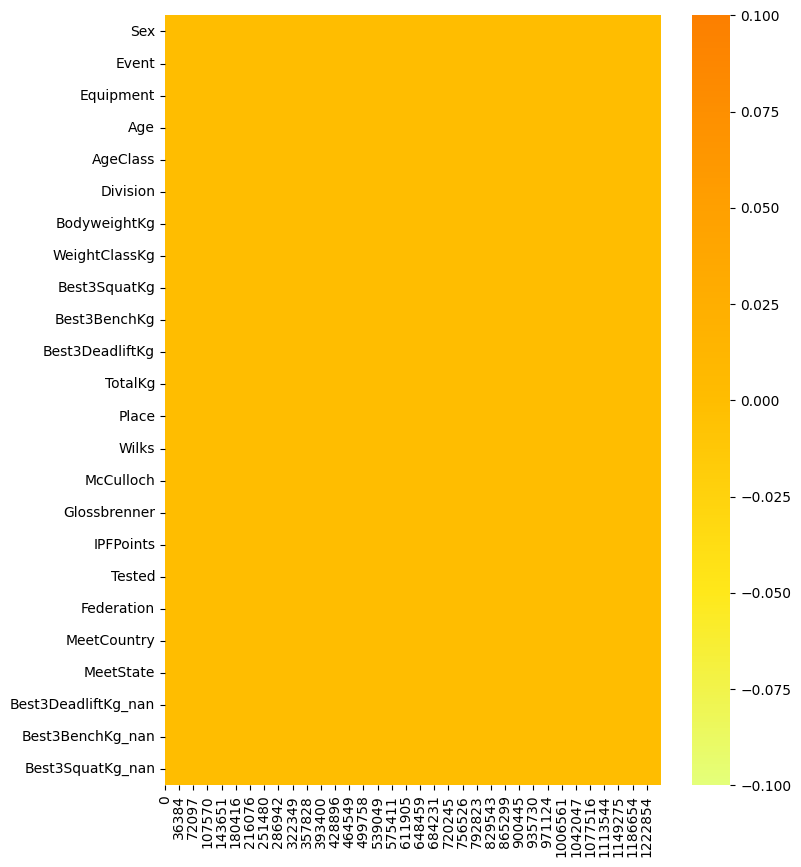

In [86]:
# Now data is clean...

plt.figure(figsize = (8, 10))
sns.heatmap(df.isna().transpose(), cmap = 'Wistia')
plt.show()

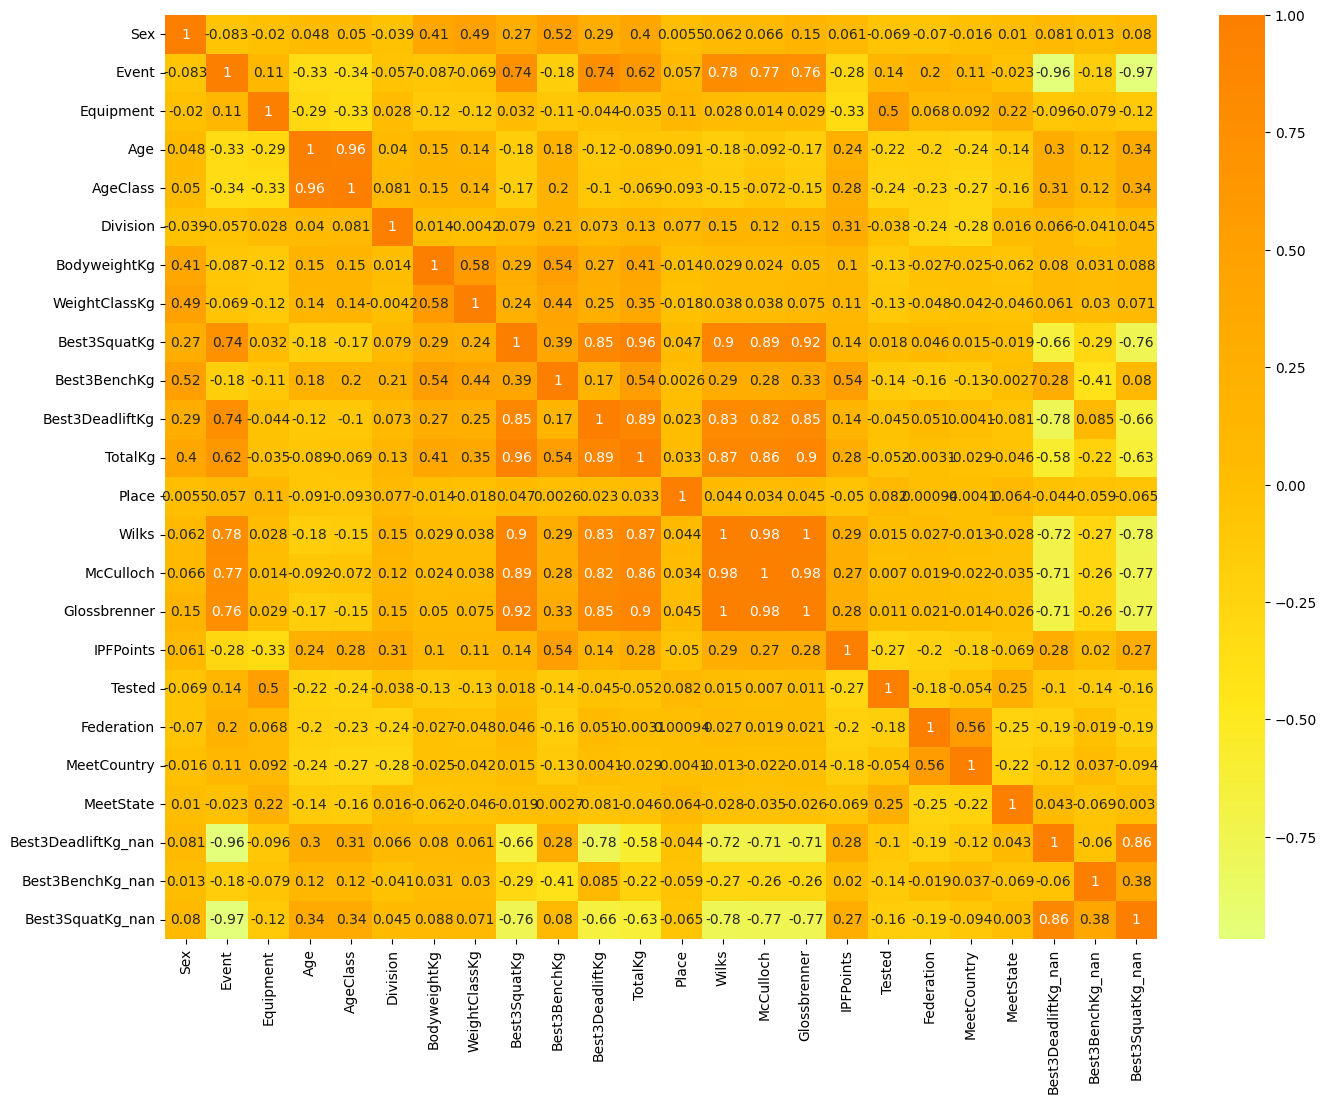

In [87]:
# Show colrrelations matrix

plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap = 'Wistia')
plt.show()


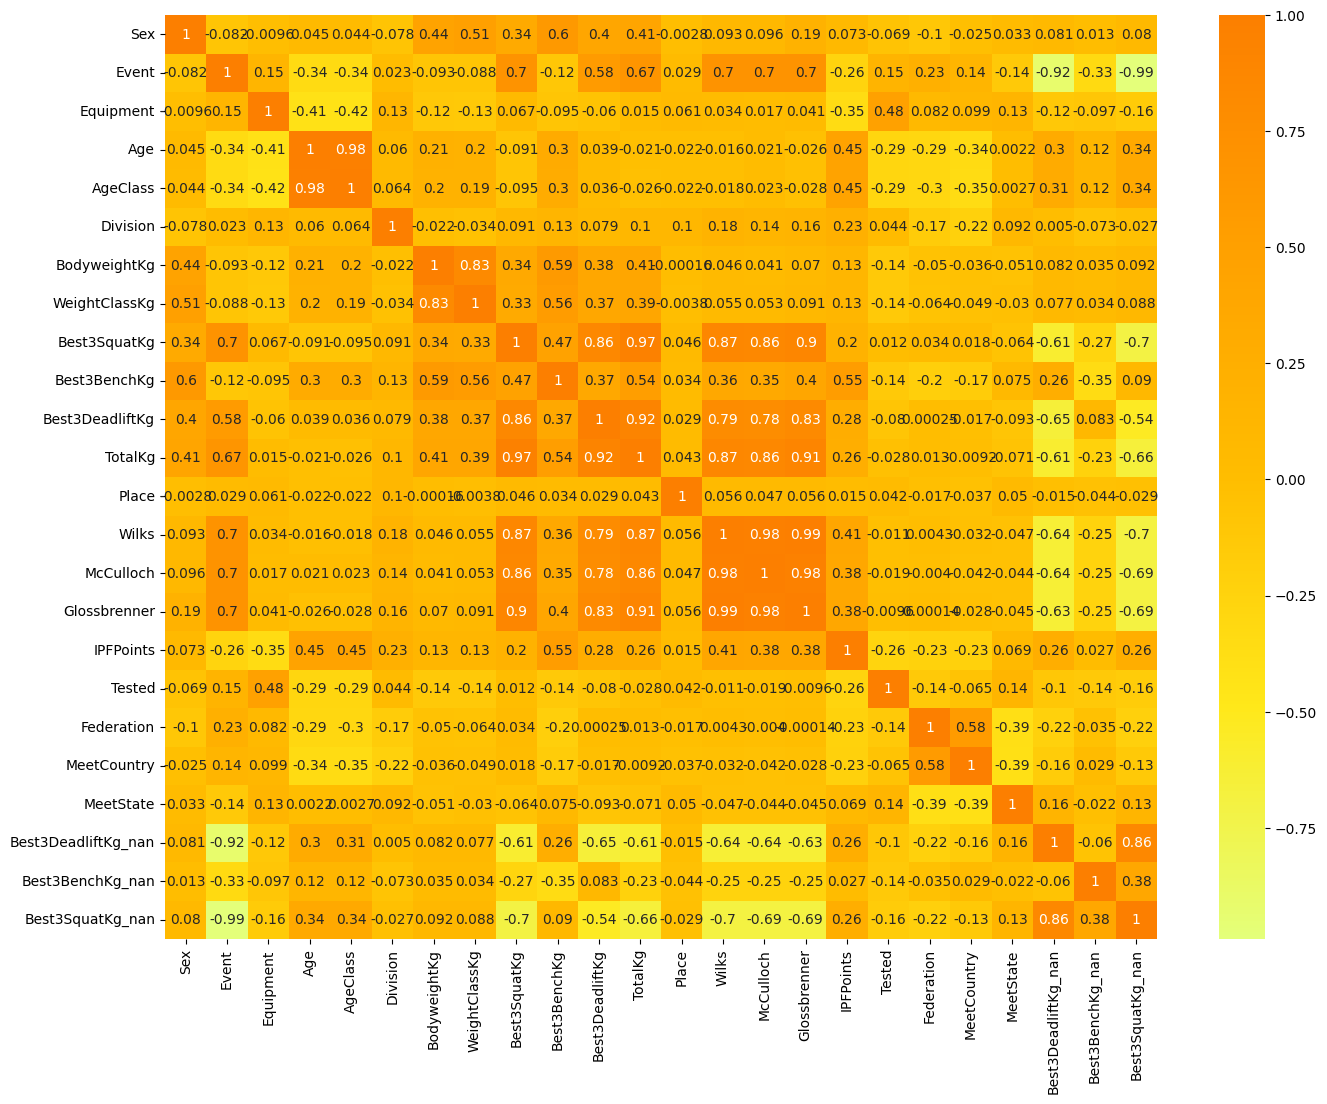

In [88]:
# May be spearman

plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(method = 'spearman'), annot = True, cmap = 'Wistia')
plt.show()

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Event'}>,
        <Axes: title={'center': 'Equipment'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AgeClass'}>],
       [<Axes: title={'center': 'Division'}>,
        <Axes: title={'center': 'BodyweightKg'}>,
        <Axes: title={'center': 'WeightClassKg'}>,
        <Axes: title={'center': 'Best3SquatKg'}>,
        <Axes: title={'center': 'Best3BenchKg'}>],
       [<Axes: title={'center': 'Best3DeadliftKg'}>,
        <Axes: title={'center': 'TotalKg'}>,
        <Axes: title={'center': 'Place'}>,
        <Axes: title={'center': 'Wilks'}>,
        <Axes: title={'center': 'McCulloch'}>],
       [<Axes: title={'center': 'Glossbrenner'}>,
        <Axes: title={'center': 'IPFPoints'}>,
        <Axes: title={'center': 'Tested'}>,
        <Axes: title={'center': 'Federation'}>,
        <Axes: title={'center': 'MeetCountry'}>],
       [<Axes: title={'center': 'MeetState'}>,
        <Axes: 

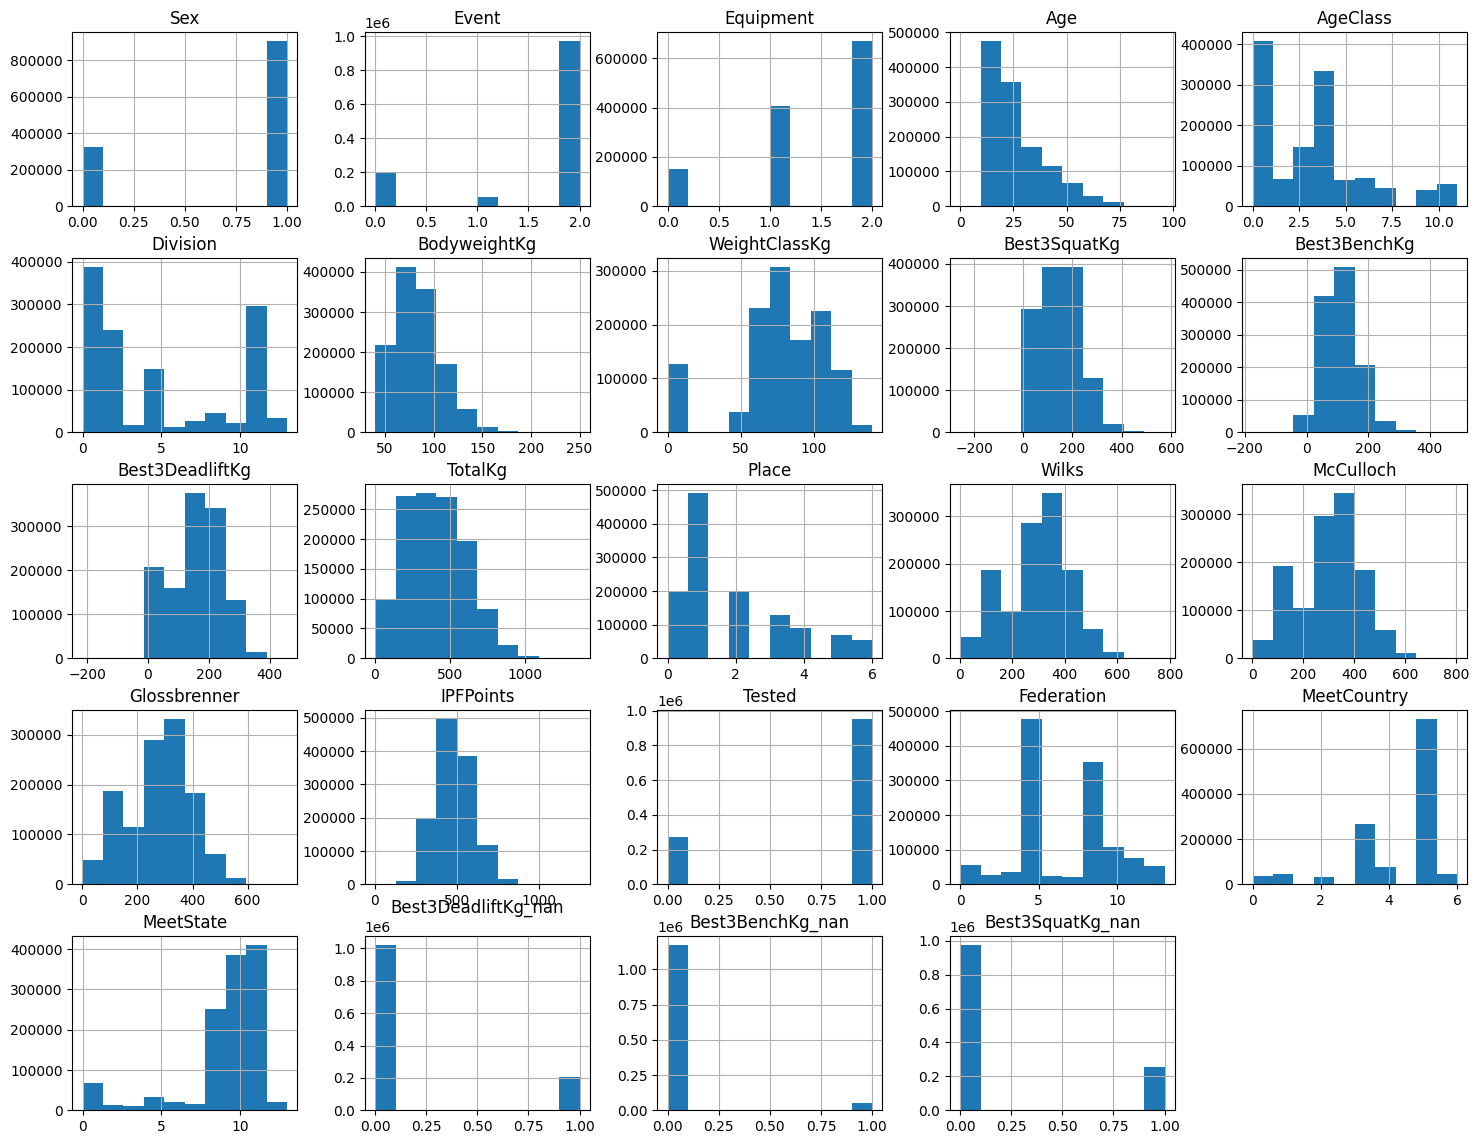

In [89]:
# Show histograms

df.hist(figsize = (18, 14))

<Axes: >

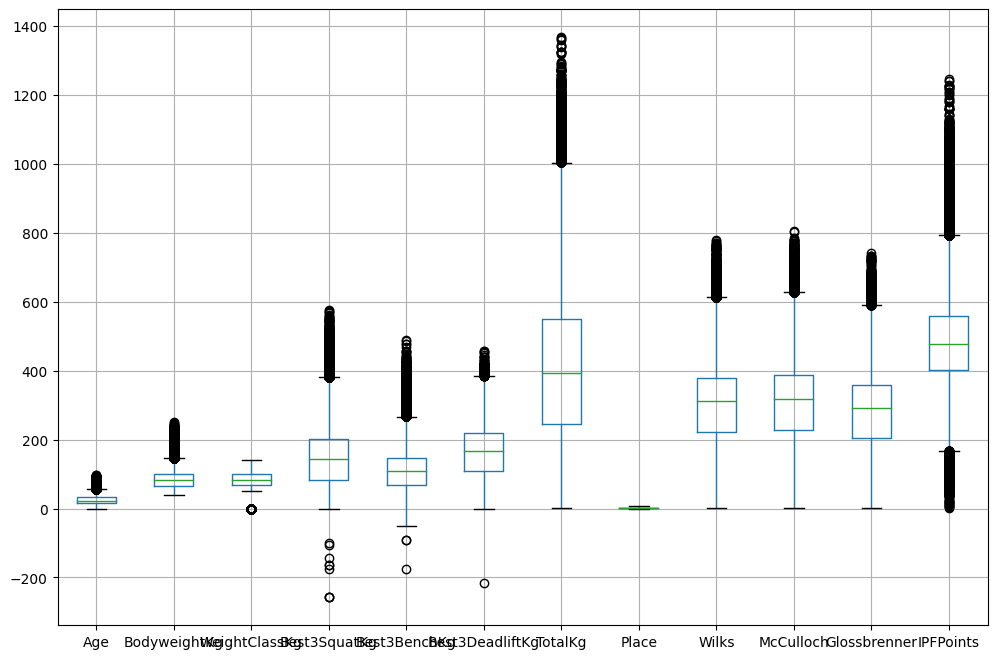

In [91]:
# Show box plots

df.drop(['Sex', 'Event', 'Equipment', 'AgeClass', 'Division', 'Tested', 'Best3DeadliftKg_nan',
         'Best3BenchKg_nan', 'Best3SquatKg_nan', 'MeetCountry', 'MeetState', 'Federation'], axis = 1).boxplot(figsize = (12, 8))

In [92]:
# Drop values that less than 0

df = df[(df['Best3SquatKg'] >= 0) & (df['Best3BenchKg'] >= 0)]

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(df.drop('Place', axis = 1), df['Place'], train_size = 0.8)

In [94]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 500, max_depth = 5)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.44      0.52      0.48     39512
           1       0.48      0.97      0.64     98405
           2       0.00      0.00      0.00     40076
           3       0.00      0.00      0.00     25727
           4       0.00      0.00      0.00     17967
           5       0.00      0.00      0.00     13603
           6       0.00      0.00      0.00     10523

    accuracy                           0.47    245813
   macro avg       0.13      0.21      0.16    245813
weighted avg       0.26      0.47      0.33    245813



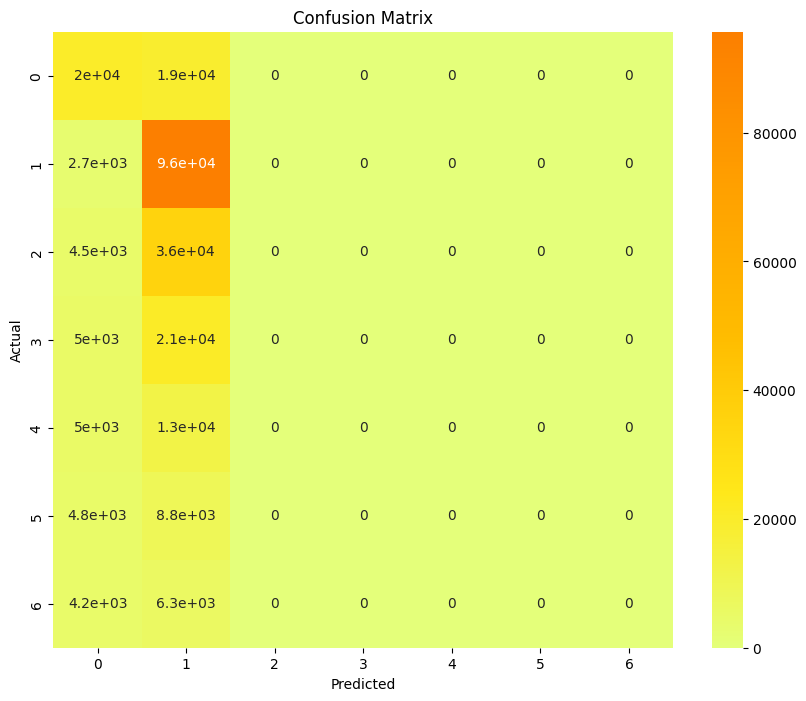

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

predicted = model.predict(X_test)

print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators = 250)

model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)

print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

In [ ]:
predicted = model.predict(X_test)

print(classification_report(y_test, predicted))
cm = confusion_matrix(y_test, predicted)

plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Dense(128, input_dim = 23, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(7, activation = 'softmax'))

early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 200,
    batch_size = batch_size,
    validation_data = (X_test, y_test),
    shuffle = True,
    callbacks = [early_stopping]
)